In [3]:
import sys, os
import pandas as pd
import numpy as np
import subprocess
import gc
import optuna
from datetime import datetime, timezone
import warnings
import xgboost as xgb
import joblib as jl
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import matthews_corrcoef
from mlflow.models import infer_signature
import mlflow
import random
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
today = datetime.now(timezone.utc).strftime("%Y_%m_%d")
warnings.filterwarnings("ignore")
from hyper_params import (
    mushroom_tuning_2024_08_06_1722934727_params,
)

# helpers
sys.path.append("..")
from helpers.loss_functions import *
from helpers.mlflow import *


SEED = 108
random.seed(SEED)
N_FOLDS = 5
# data
train_path = "../data/mushrooms/train.csv"
test_path = "../data/mushrooms/test.csv"
cache_path = "../data/mushrooms/cache"

In [4]:
train_df = pd.read_csv(train_path)
print(f"train size: {train_df.shape}")
test_df = pd.read_csv(test_path)
print(f"test size: {test_df.shape}")

train size: (3116945, 22)
test size: (2077964, 21)


<Axes: xlabel='count', ylabel='class'>

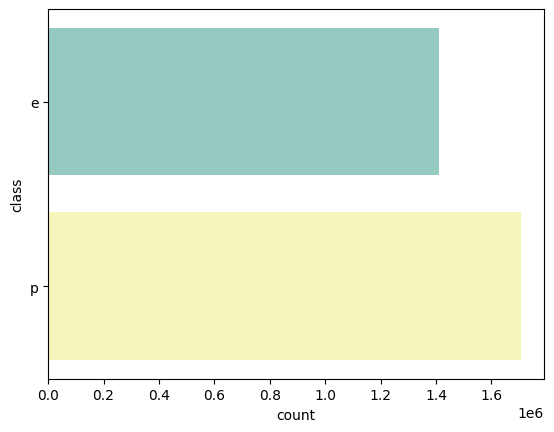

In [5]:
sns.countplot(train_df['class'], palette='Set3')


In [6]:
correlations = train_df.drop(columns="class").corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

ValueError: could not convert string to float: 'f'